<a href="https://colab.research.google.com/github/lavanyasaxena/lavanyasaxena/blob/master/dogs__and_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:08<00:00, 108MB/s] 
100% 1.06G/1.06G [00:08<00:00, 134MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [5]:
#create batches

train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [7]:
#creating model by using Convolutional Neural Network(CNN)
model=Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
625/625 [==============================] - 98s 156ms/step - loss: 1.3762 - accuracy: 0.5907 - val_loss: 0.6651 - val_accuracy: 0.5905
Epoch 2/2
625/625 [==============================] - 99s 158ms/step - loss: 0.5856 - accuracy: 0.6994 - val_loss: 0.5476 - val_accuracy: 0.7159


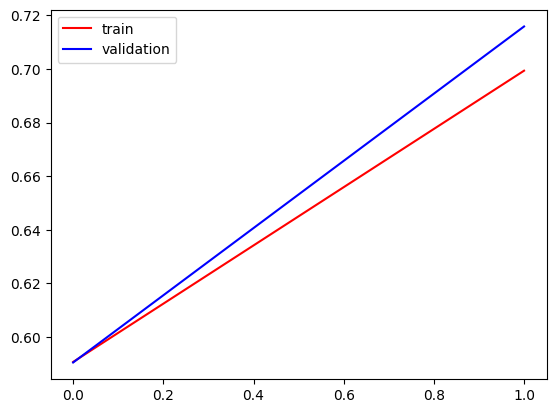

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

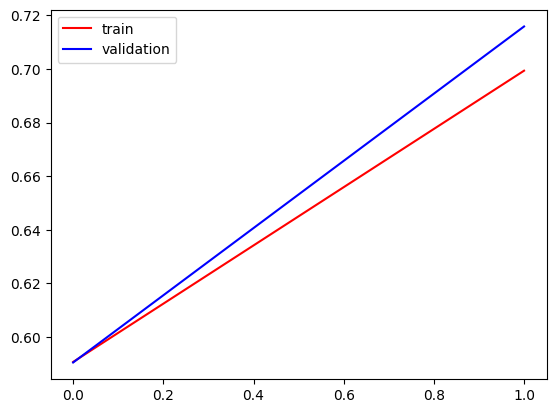

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

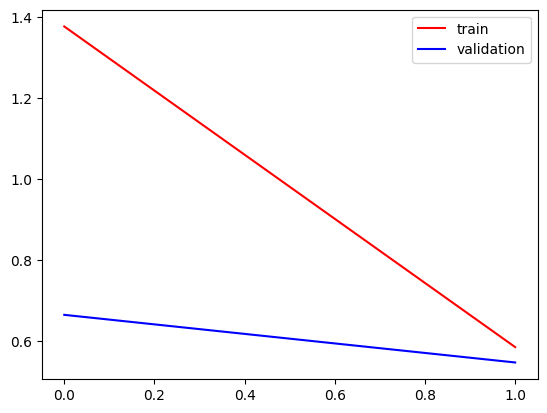

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

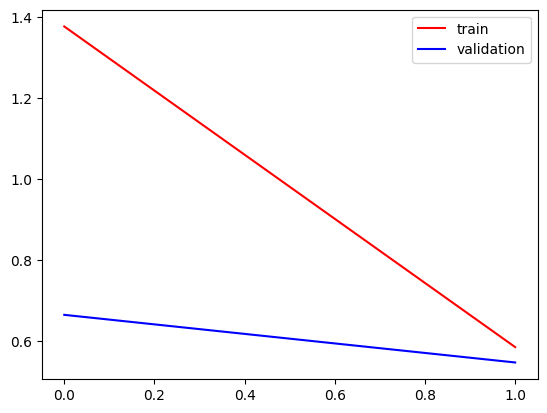

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
import cv2

In [17]:
test_image=cv2.imread('/content/cat.jpg')

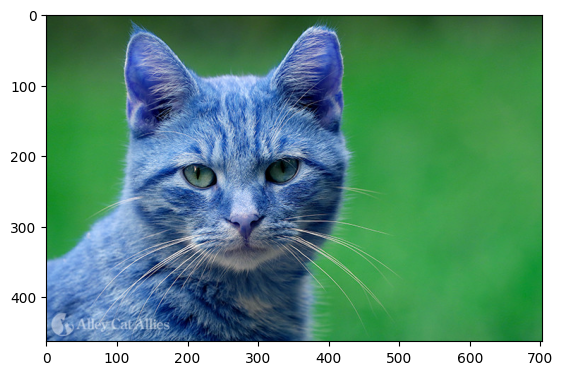

In [18]:
plt.imshow(test_image)

In [19]:
test_image.shape

(463, 703, 3)

In [20]:
test_image=cv2.resize(test_image,(256,256))

In [21]:
test_input=test_image.reshape(1,256,256,3)

In [22]:
model.predict(test_input)

1/1 [==============================] - 1s 514ms/step


array([[1.]], dtype=float32)